# PREDICTION USING DECISION TREE ALGORITHM
# RISHIKA RASHI
# DATA SCIENCE TASK-2

### IMPORT THE LIBRARIES:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from jupyterthemes import jtplot
from pandas_profiling import ProfileReport
%matplotlib inline

<ipython-input-1-9349decebfc9>:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


### IMPORT THE DATA SET:

In [2]:
iris=pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### VISUALIZE THE DATA SET:

In [3]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.drop('Id',axis=1,inplace=True)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.shape

(150, 5)

In [8]:
iris.size

750

In [9]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [12]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [13]:
report = ProfileReport(iris,title='Iris_Dataset_Analysis')
report.to_file('Iris_Dataset_Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

###  ANALYZE THE DATA SET:

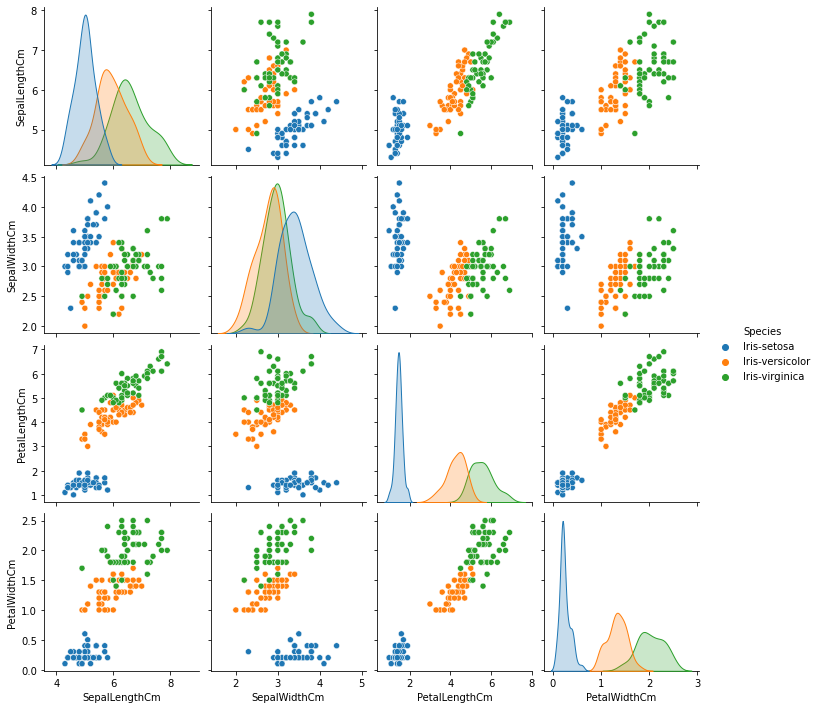

In [14]:
sns.pairplot(iris,hue='Species')

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Frequency'>

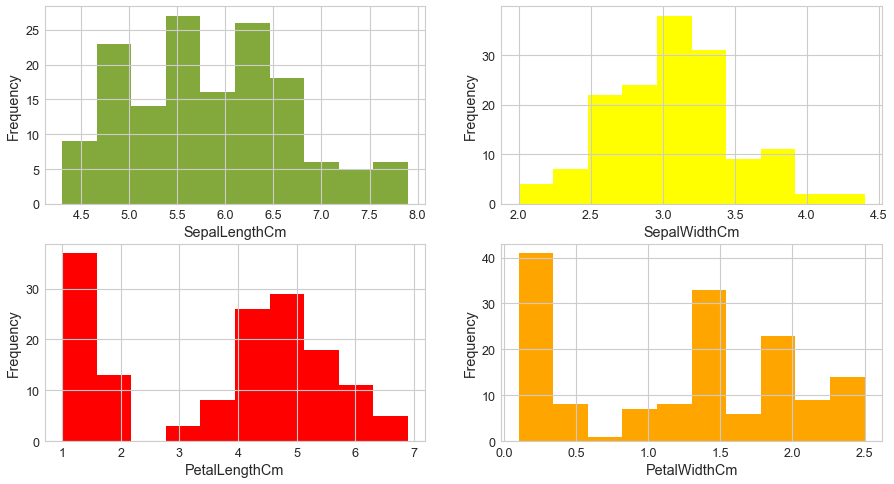

In [15]:
jtplot.style()
fig=plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.xlabel('SepalLengthCm')
iris['SepalLengthCm'].plot(kind='hist',color='g')
plt.subplot(2,2,2)
plt.xlabel('SepalWidthCm')
iris['SepalWidthCm'].plot(kind='hist',color='yellow')
plt.subplot(2,2,3)
plt.xlabel('PetalLengthCm')
iris['PetalLengthCm'].plot(kind='hist',color='red')
plt.subplot(2,2,4)
plt.xlabel('PetalWidthCm')
iris['PetalWidthCm'].plot(kind='hist',color='orange')

<AxesSubplot:>

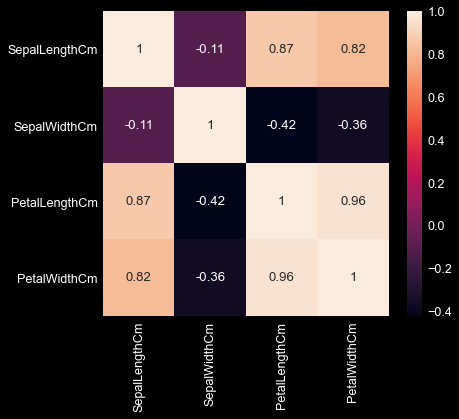

In [16]:
jtplot.style()
plt.style.use('dark_background')
sns.heatmap(iris.corr(),annot=True)

## MACHINE LEARNING
### IMPORT THE LIBRARIES:

In [17]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree
from mlxtend.plotting import plot_confusion_matrix

### Organize Data For Creating The Model

In [18]:
X=iris[['SepalLengthCm'	,'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=iris['Species']

In [19]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
y=l.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Split Dataset Into Training And Testing Set

In [20]:
input_train,input_test,output_train,output_test=train_test_split(X,y,train_size=0.8,random_state=1,stratify=y)

### Create The Model And Fit Training Dataset

In [21]:
dt=DecisionTreeClassifier(random_state=0)

In [22]:
cross_val_score(dt,input_train,output_train,cv=10).mean()

0.9416666666666667

### Predict The Output For Testing Dataset

In [23]:
dt=dt.fit(input_train,output_train)

In [24]:
dt.score(input_test,output_test)

0.9666666666666667

In [25]:
y_Predict=dt.predict(input_test)
y_Predict

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

### Evalute The Accuracy Of The Model

In [26]:
print('Accuracy of the model is :',accuracy_score(y_Predict,output_test))

Accuracy of the model is : 0.9666666666666667


(<Figure size 460.8x403.2 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

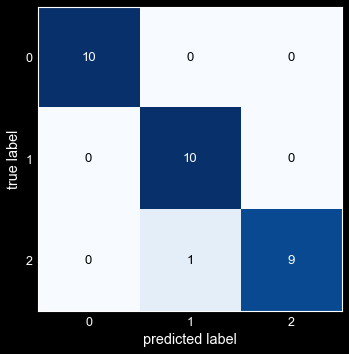

In [27]:
plot_confusion_matrix(confusion_matrix(output_test,y_Predict))

In [28]:
print(classification_report(output_test,y_Predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [29]:
iris_traget=pd.DataFrame({'Actual':output_test,'Predicted':y_Predict})
iris_traget

,Actual,Predicted
0,2,2
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,2,2
7,2,2
8,2,2
9,1,1


### VISUALIZE THE DECISION TREE

In [30]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_3 <= 0.75
|   |--- class: 0
|--- feature_3 >  0.75
|   |--- feature_2 <= 4.75
|   |   |--- class: 1
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: 2



In [31]:
import matplotlib

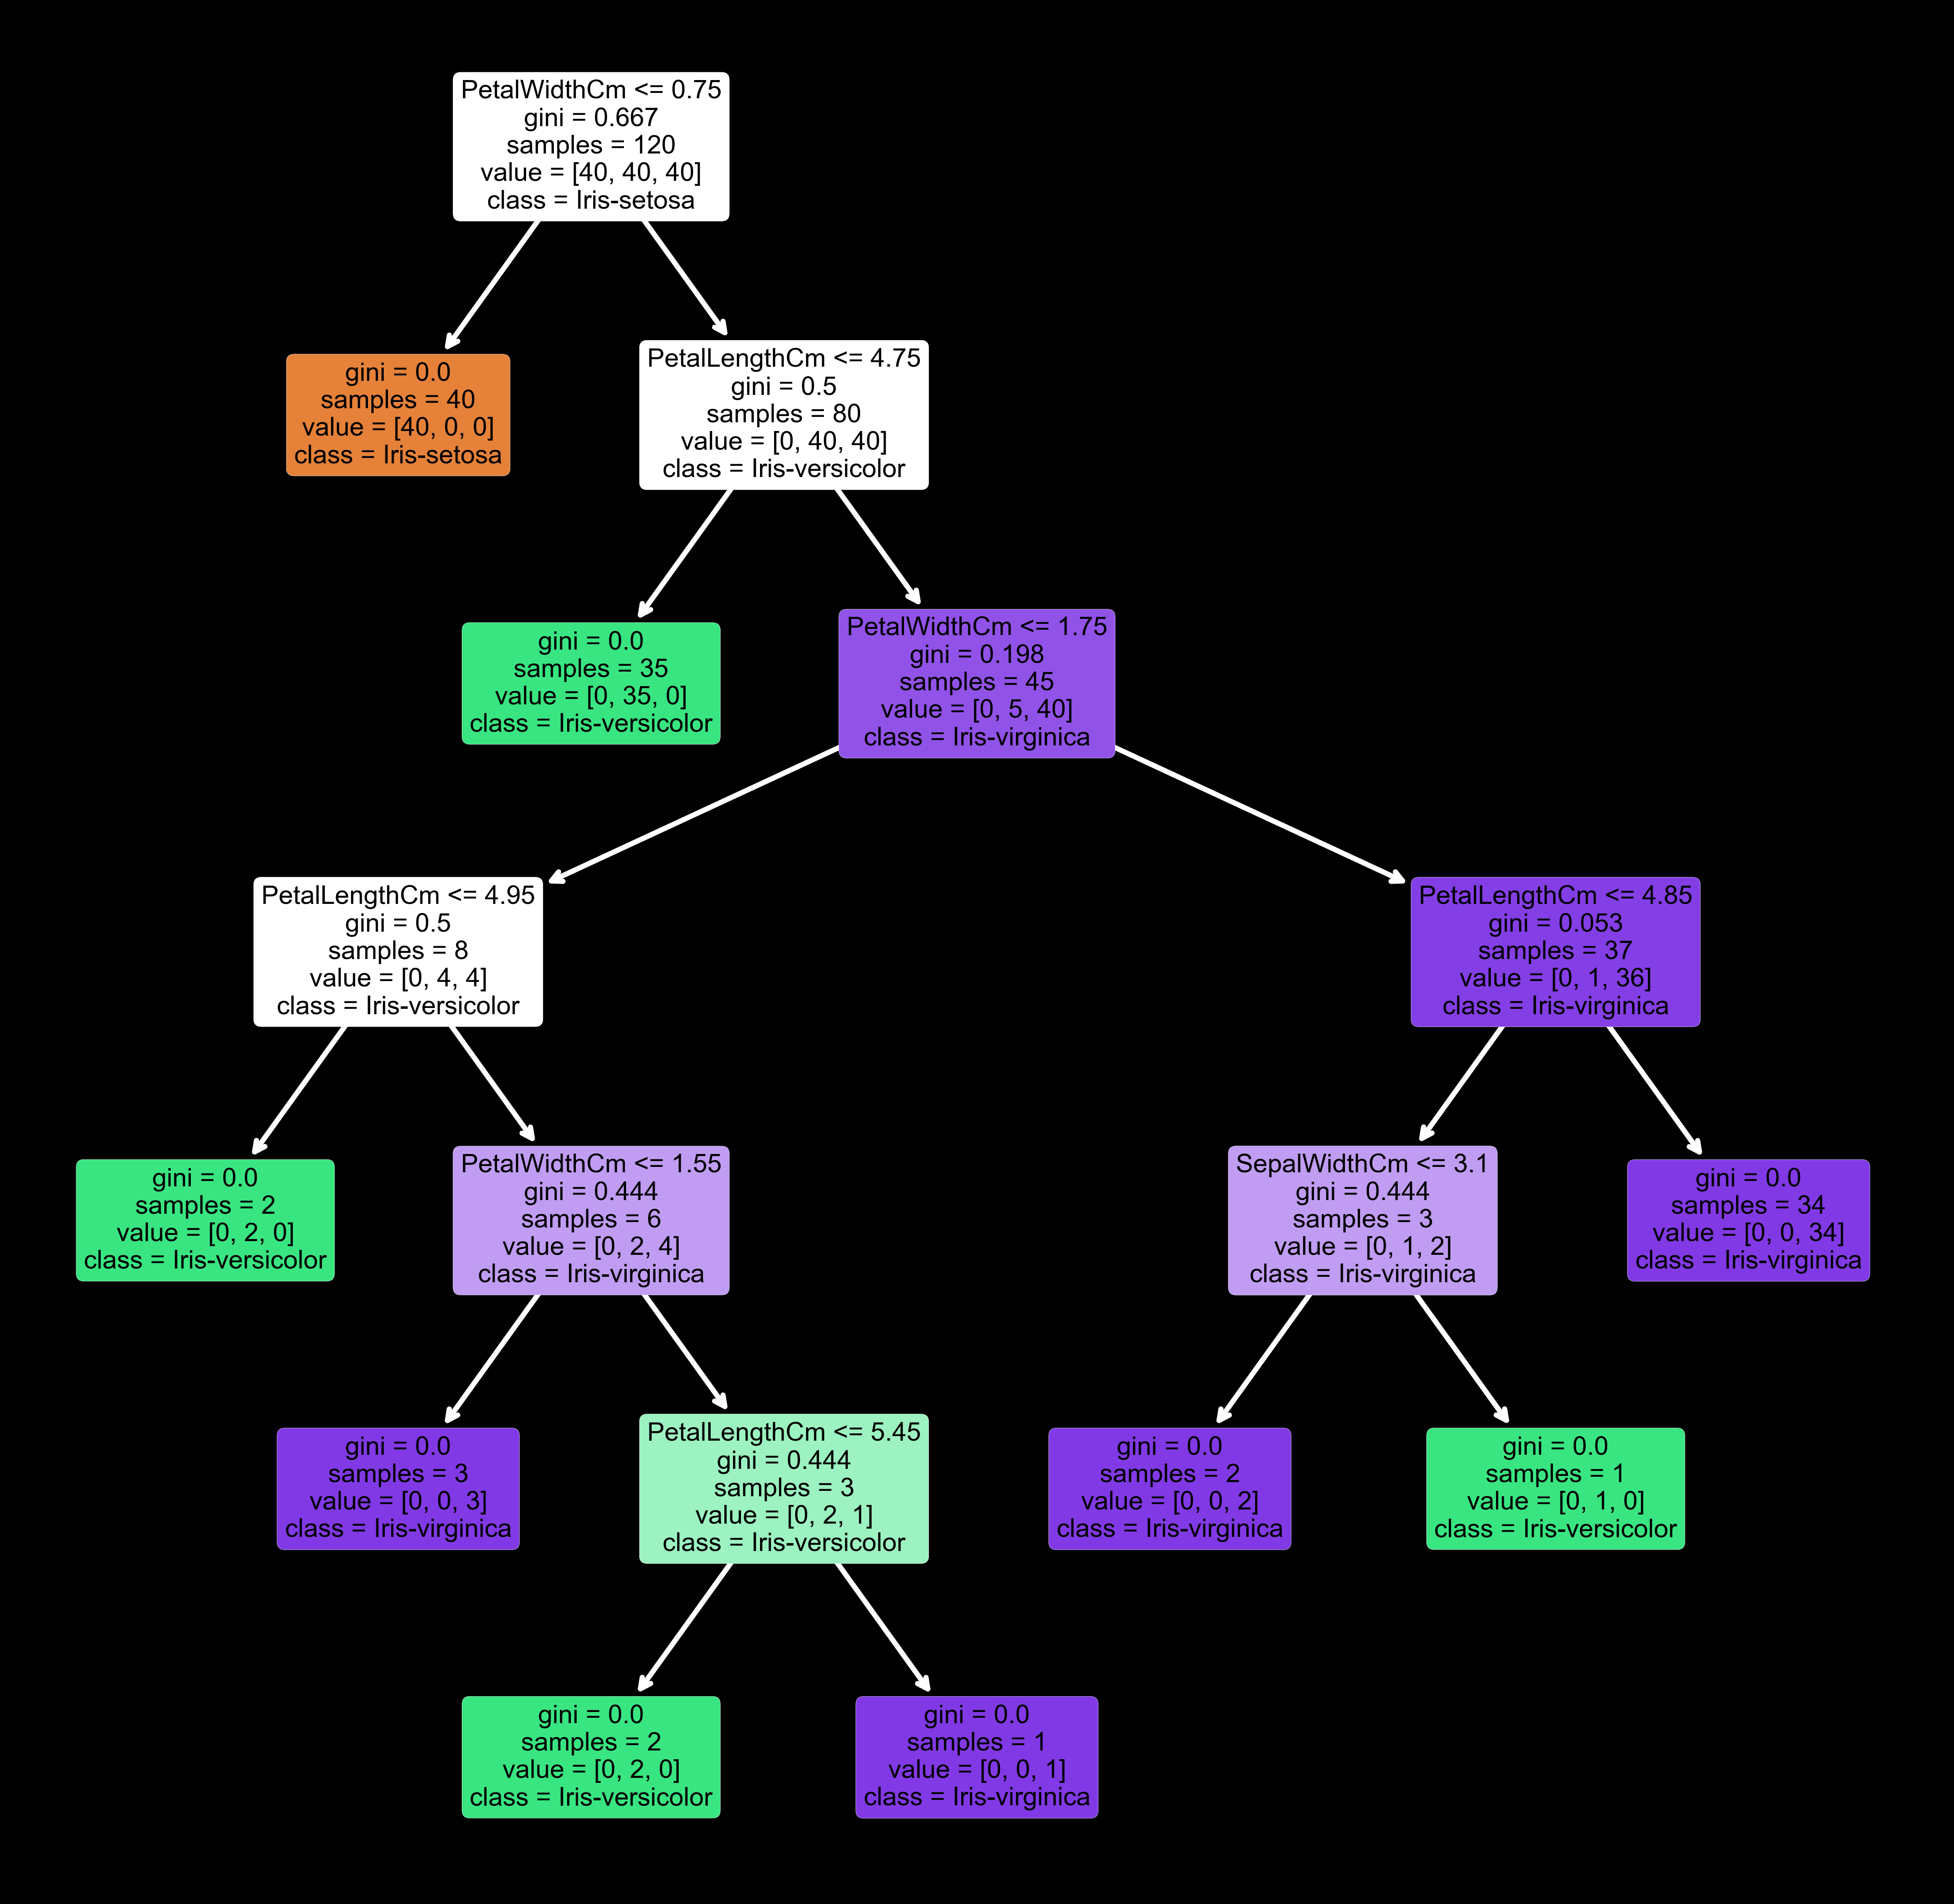

In [34]:
matplotlib.rcParams['text.color'] = 'black'
fig, ax = plt.subplots(figsize=(20, 20),dpi=300)
clf_tree = tree.plot_tree(dt,filled=True,rounded=True,
               feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
               class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],fontsize=15)
for o in clf_tree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('white')
        arrow.set_linewidth(3)

plt.savefig('Iris_Dataset_Decision_Tree.png')
